/home/ramesh.anu/.conda/envs/torch_gpu/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.action_type to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_type` for environment variables or `env.get_wrapper_attr('action_type')` that will search the reminding wrappers.
  logger.warn(
/home/ramesh.anu/.conda/envs/torch_gpu/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.action_type to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_type` for environment variables or `env.get_wrapper_attr('action_type')` that will search the reminding wrappers.
  logger.warn(
/home/ramesh.anu/.conda/envs/torch_gpu/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.action_type to get variables from other wrappers is deprecated and will be removed in v1.0, to get this vari

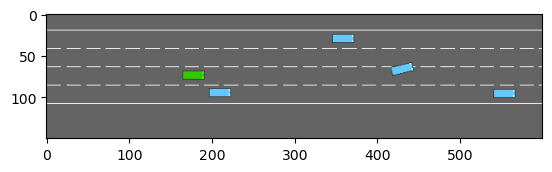

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
%matplotlib inline

env = gym.make('highway-v0', render_mode='rgb_array')
env.reset()

for _ in range(3):
    action = env.action_type.actions_indexes['IDLE']
    obs, reward, done, _, info = env.step(action)
    env.render()

plt.imshow(env.render())
plt.show()

In [ ]:
env = gym.make("highway-fast-v0")
model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="highway_dqn/")
model.learn(int(2e4))
model.save("highway_dqn/model")

# Load and test saved model
model = DQN.load("highway_dqn/model")
while True:
  done = truncated = False
  obs, info = env.reset()
  while not (done or truncated):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_dqn/DQN_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 12.5     |
|    exploration_rate | 0.969    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 41       |
|    time_elapsed     | 1        |
|    total_timesteps  | 66       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14       |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.947    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 41       |
|    time_elapsed     | 2        |
|    total_timesteps  | 112      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|